<a href="https://colab.research.google.com/github/sanjeev29/EVA-4/blob/master/S9/s9_quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import datetime

print("Current Date/Time: ", datetime.datetime.now())

Current Date/Time:  2020-03-17 23:31:43.053559


In [3]:
from google.colab import drive

drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/Colab\ Notebooks/models/

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks/models


# Import Libraries

In [0]:
%matplotlib inline
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

# Import loader

* Initialize train and test loaders from train and test dataset respectively

* CUDA check

In [5]:
from utils import loader

# Initialize CIFAR-10 classes
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck') 

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


# Plot training images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


plane   dog  deer  deer


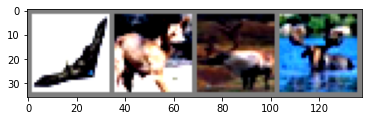

In [6]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(loader.trainloader_for_plot)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# Import model

Initialize network for the model

In [0]:
from QuizDNN import QuizDNN

# Model parameters

In [12]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(f"Device: {device}")
net = QuizDNN().to(device)
summary(net, input_size=(3, 32, 32))

Device: cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
              ReLU-2           [-1, 64, 32, 32]               0
       BatchNorm2d-3           [-1, 64, 32, 32]             128
            Conv2d-4           [-1, 64, 32, 32]          36,928
              ReLU-5           [-1, 64, 32, 32]               0
       BatchNorm2d-6           [-1, 64, 32, 32]             128
            Conv2d-7           [-1, 64, 32, 32]          36,928
              ReLU-8           [-1, 64, 32, 32]               0
       BatchNorm2d-9           [-1, 64, 32, 32]             128
        MaxPool2d-10           [-1, 64, 16, 16]               0
           Conv2d-11           [-1, 64, 16, 16]          36,928
             ReLU-12           [-1, 64, 16, 16]               0
      BatchNorm2d-13           [-1, 64, 16, 16]             128
           Conv2d-14      

# Loss function and optimizer



In [0]:
import torch.nn as nn
import torch.optim as optim

from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9, weight_decay=0.0001)
scheduler = StepLR(optimizer, step_size=6, gamma=0.5)

# Training and Testing

In [0]:
from utils import train
from utils import test

# Training and testing our model

In [15]:
epochs = 15
last_epoch = False

for epoch in range(epochs):
  train.train(net, device, loader.trainloader, optimizer, criterion, epoch)
  scheduler.step()
  if epoch == epochs - 1:
    last_epoch = True
  test.test(net, device, loader.testloader, criterion, last_epoch)

Epoch= 0 Loss=0.761698842048645 Batch_id=781 Accuracy=55.29: 100%|██████████| 782/782 [00:26<00:00, 29.96it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0158, Accuracy: 6426/10000 (64.26%)



Epoch= 1 Loss=0.8522590398788452 Batch_id=781 Accuracy=70.88: 100%|██████████| 782/782 [00:26<00:00, 31.48it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0118, Accuracy: 7358/10000 (73.58%)



Epoch= 2 Loss=0.49879783391952515 Batch_id=781 Accuracy=77.07: 100%|██████████| 782/782 [00:25<00:00, 32.33it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0104, Accuracy: 7687/10000 (76.87%)



Epoch= 3 Loss=0.9136383533477783 Batch_id=781 Accuracy=80.93: 100%|██████████| 782/782 [00:26<00:00, 31.45it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0087, Accuracy: 8041/10000 (80.41%)



Epoch= 4 Loss=0.3077670633792877 Batch_id=781 Accuracy=83.36: 100%|██████████| 782/782 [00:25<00:00, 30.18it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0085, Accuracy: 8147/10000 (81.47%)



Epoch= 5 Loss=0.6444511413574219 Batch_id=781 Accuracy=84.85: 100%|██████████| 782/782 [00:26<00:00, 29.78it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0080, Accuracy: 8196/10000 (81.96%)



Epoch= 6 Loss=0.5886184573173523 Batch_id=781 Accuracy=88.38: 100%|██████████| 782/782 [00:25<00:00, 30.26it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0070, Accuracy: 8462/10000 (84.62%)



Epoch= 7 Loss=0.2711702287197113 Batch_id=781 Accuracy=89.59: 100%|██████████| 782/782 [00:26<00:00, 29.96it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0069, Accuracy: 8522/10000 (85.22%)



Epoch= 8 Loss=0.345662921667099 Batch_id=781 Accuracy=90.31: 100%|██████████| 782/782 [00:25<00:00, 30.16it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0069, Accuracy: 8540/10000 (85.40%)



Epoch= 9 Loss=0.49795031547546387 Batch_id=781 Accuracy=91.06: 100%|██████████| 782/782 [00:25<00:00, 30.67it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0072, Accuracy: 8466/10000 (84.66%)



Epoch= 10 Loss=0.3496139943599701 Batch_id=781 Accuracy=91.48: 100%|██████████| 782/782 [00:25<00:00, 30.14it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0069, Accuracy: 8557/10000 (85.57%)



Epoch= 11 Loss=0.45996928215026855 Batch_id=781 Accuracy=92.35: 100%|██████████| 782/782 [00:26<00:00, 29.88it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0072, Accuracy: 8528/10000 (85.28%)



Epoch= 12 Loss=0.4401506781578064 Batch_id=781 Accuracy=94.42: 100%|██████████| 782/782 [00:25<00:00, 30.41it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0065, Accuracy: 8622/10000 (86.22%)



Epoch= 13 Loss=0.19769605994224548 Batch_id=781 Accuracy=95.01: 100%|██████████| 782/782 [00:25<00:00, 32.50it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0069, Accuracy: 8606/10000 (86.06%)



Epoch= 14 Loss=0.1707199215888977 Batch_id=781 Accuracy=95.53: 100%|██████████| 782/782 [00:25<00:00, 30.25it/s]



Validation set: Average loss: 0.0068, Accuracy: 8641/10000 (86.41%)



# Result visualization

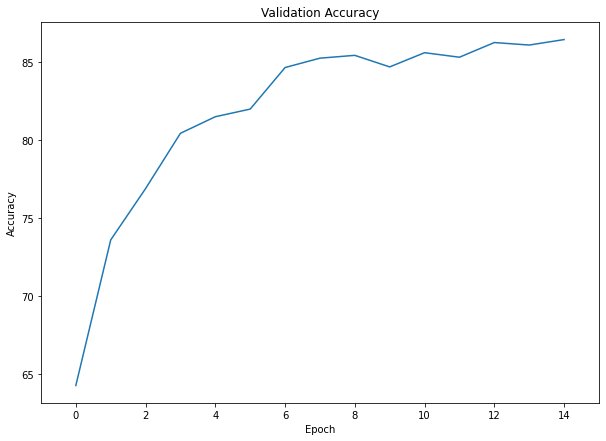

In [17]:
val_acc_fig, axs = plt.subplots(1,1,figsize=(10,7))
axs.set_xlim([-1, 15])
axs.plot(test.test_acc)
axs.set_title("Validation Accuracy")
axs.set_xlabel("Epoch")
axs.set_ylabel("Accuracy")
val_acc_fig.savefig('/content/gdrive/My Drive/Colab Notebooks/S9/quiz_validation_accuracy_change_plot.jpg')

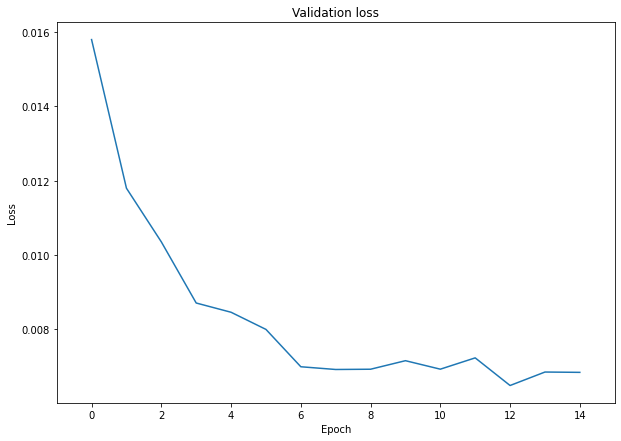

In [18]:
val_loss_fig, axs = plt.subplots(1,1,figsize=(10,7))
axs.set_xlim([-1, 15])
axs.plot(test.test_losses)
axs.set_title("Validation loss")
axs.set_xlabel("Epoch")
axs.set_ylabel("Loss")
val_loss_fig.savefig('/content/gdrive/My Drive/Colab Notebooks/S9/quiz_validation_loss_change_plot.jpg')

# Performance of CIFAR-10 classes


In [19]:
test.test_class_performance(net, device, loader.testloader, classes)

100%|██████████| 157/157 [00:02<00:00, 64.95it/s]

Accuracy of plane : 84 %
Accuracy of   car : 94 %
Accuracy of  bird : 89 %
Accuracy of   cat : 70 %
Accuracy of  deer : 87 %
Accuracy of   dog : 83 %
Accuracy of  frog : 85 %
Accuracy of horse : 90 %
Accuracy of  ship : 95 %
Accuracy of truck : 89 %
